# Figure 3 - `{Figure I am legend }`

A small description for the analysis, the metrics and how to interpret the figure.

## **NOTE**:

We assume that you have cloned the analysis repository and have `cd` into the parent directory. Before starting with the analysis make sure you have first completed the dependencies set up by following the instructions described in the **`dependencies/README.md`** document. All paths defined in this Notebook are relative to the parent directory (repository). Please close this Notebook and start again by following the above guidelines if you have not completed the aforementioned steps.

## Loading dependencies

In [11]:
# Figure 3c
library(coda)
library(rjags)
library(runjags)
source('dimorphAS/DBDA2Eprograms/DBDA2E-utilities.R')
load('dimorphAS/figures/figure3/figure3c.RData')

# Figure 3e
library(grid)
library(gridExtra)
library(ggplot2)
library(ggsci)
load("dimorphAS/figures/figure3/figure3e.Rdata")


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



## Figure 3c

Some text for describing what is going to be executed and what it will produce

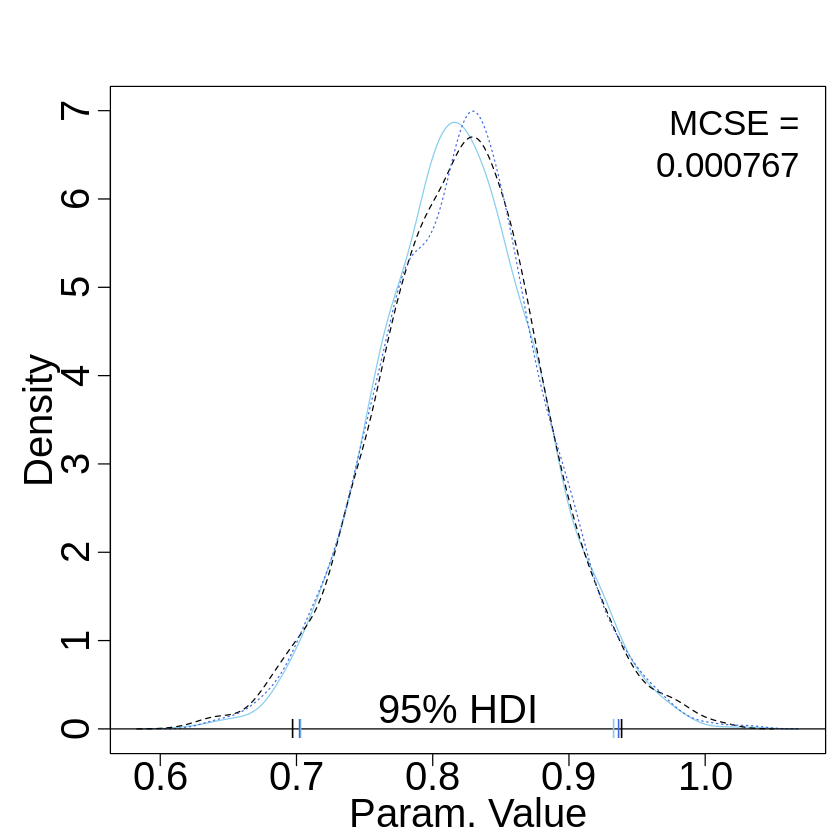

In [6]:
npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.8)
npgGreen <- rgb(0,160/256,135/256,1)
npgBrown <- rgb(126/256,97/256,72/256,1)


myDbdaDensPlot = function( codaObject , parName=varnames(codaObject)[1] , plColors=NULL ) {
  if ( all( parName != varnames(codaObject) ) ) { 
    stop("parName must be a column name of coda object")
  }
  nChain = length(codaObject) # or nchain(codaObject)
  if ( is.null(plColors) ) plColors=1:nChain
  xMat = NULL
  yMat = NULL
  hdiLims = NULL
  for ( cIdx in 1:nChain ) {
    densInfo = density(codaObject[,c(parName)][[cIdx]]) 
    xMat = cbind(xMat,densInfo$x)
    yMat = cbind(yMat,densInfo$y)
    hdiLims = cbind(hdiLims,HDIofMCMC(codaObject[,c(parName)][[cIdx]]))
  }
  matplot( xMat , yMat , type="l" , col=plColors , 
           main="" , xlab="Param. Value" , ylab="Density" )
  abline(h=0)
  points( hdiLims[1,] , rep(0,nChain) , col=plColors , pch="|" )
  points( hdiLims[2,] , rep(0,nChain) , col=plColors , pch="|" )
  text( mean(hdiLims) , 0 , "95% HDI" , adj=c(0.5,-0.2), cex=2 )
  EffChnLngth = effectiveSize(codaObject[,c(parName)])
  MCSE = sd(as.matrix(codaObject[,c(parName)]))/sqrt(EffChnLngth) 
  text( max(xMat) , max(yMat) , adj=c(1.0,1.0) , cex=1.75 ,
        paste("MCSE =\n",signif(MCSE,3)) )
}

mydiag <- function( codaObject , parName=varnames(codaObject)[1] ,
                    saveName=NULL , saveType="pdf" ) {
  DBDAplColors =  c("skyblue","black","royalblue","steelblue")#c(npgBlue,"black",npgRed,npgGreen)
  par( mar=0.5+c(3,4,1,0) , oma=0.1+c(0,0,2,0) , mgp=c(2.25,0.7,0) , 
       cex.lab=2 , cex.axis=2)
  require(coda)
  # The following is the HDI plot
  myDbdaDensPlot(codaObject,parName,plColors=DBDAplColors)
  #Uncomment the following to add the title (beta3[101]), which is not informative so
  # we will leave it out.
  #mtext( text=parName , outer=TRUE , adj=c(0.5,0.5) , cex=2.0 )
}


mydiag( mcmcCoda , parName=c("beta3[101]") , saveName="fig3c")  

## Figure 3e
Some text for describing what is going to be executed and what it will produce

MATR3      RBM6      MSI1    ZNF638     ESRP2   KHDRBS3      YBX1       FUS 
      124        96        88        88        84        84        84        82 
   HNRNPC  HNRNPCL1   KHDRBS1      FXR2      TIA1     PCBP1     PTBP1     RBM42 
       78        78        76        74        74        72        70        70 
    SRSF9    PABPN1     RBM45    SAMD4A      RALY     RBM28     SRP54      YBX2 
       70        68        66        66        64        64        64        64 
    RBM38    SRSF10     G3BP2     RBM24     RBM41       SF1     SRSF7    HNRNPK 
       62        62        60        60        60        60        60        58 
    CPEB4    PABPC1    ZC3H14      RBM4     SNRPA      PUM2       QKI    TARDBP 
       54        54        52        50        50        48        48        48 
     A1CF    DAZAP1      FXR1 HNRNPA1L2 HNRNPA2B1     PPRC1    PABPC5    HNRNPF 
       46        46        46        46        46        46        44        42 
   HNRNPL    PABPC3      RBM3      RSF1   HNRNPH1     MBNL1     PCBP3     RBMS3 
       42        42        42        42        40        40        40        40 
   RBFOX1      RBM5     SRSF1     ZCRB1     CPEB2   KHDRBS2     SRSF2     ENOX1 
       38        38        38        38        36        36        36        34 
  SNRNP70     SART3     U2AF2   HNRNPA1    HNRNPM      SFPQ   IGF2BP2      TUT1 
       34        32        32        30        28        28        26        26 
   LIN28A     RBM46      FMR1    ANKHD1     CNOT4       CPO     RBMS1   HNRNPH2 
       24        24        22        20        20        20        20        18 
    PCBP2    ZC3H10   IGF2BP3    PABPC4    HNRNPU     RBM8A      RBP1 
       18        18        16        16        12        12        10

[1] "ESRP2"   "FUS"     "HNRNPC"  "KHDRBS3" "MATR3"   "MSI1"    "PTBP1"  
 [8] "RBM6"    "SRSF9"   "TIA1"    "YBX1"

ZNF638      U2AF2      MATR3      G3BP2     PABPN1    HNRNPH2      PCBP1 
231.755299 103.318147 101.669403  97.490804  82.390970  80.885843  73.804518 
     RBM46    KHDRBS1   HNRNPCL1      CNOT4       FXR2      RBM38     HNRNPK 
 73.248530  73.012378  67.281303  66.499616  66.096933  65.947227  65.677914 
    RBFOX1     HNRNPU       PUM2  HNRNPA1L2      SART3     ANKHD1       SFPQ 
 55.187211  54.810143  53.974435  53.892585  53.032179  52.711193  51.332509 
    SRSF10      PCBP2      MBNL1      RBMS1       RBM5    KHDRBS3      RBM28 
 50.772649  50.760958  50.231449  50.195396  48.409528  47.706766  45.857959 
    TARDBP    HNRNPH1        SF1       RSF1      PPRC1      RBM8A        FUS 
 45.246139  44.974131  44.624317  44.615520  43.899839  43.770269  43.082798 
 HNRNPA2B1     DAZAP1       FXR1       FMR1     HNRNPM       RALY      SRSF7 
 42.041978  41.609897  40.686239  40.510028  40.025274  39.567994  39.556289 
     PTBP1      SRP54       YBX1     HNRNPF      SRSF2       TIA1      ESRP2 
 39.528589  39.514450  39.206720  37.887832  37.297149  37.252155  36.634561 
   SNRNP70      SRSF9      SRSF1     SAMD4A      RBM42     ZC3H14       MSI1 
 36.395626  36.266005  35.241413  34.842829  34.755535  34.566477  34.524603 
     RBM41       RBM6      ZCRB1     PABPC1     HNRNPL       RBM4       YBX2 
 33.944720  33.659808  33.105912  32.838818  30.499826  30.068266  29.586932 
      TUT1    KHDRBS2      SNRPA      RBM24        QKI       A1CF     PABPC5 
 29.441722  29.009331  28.977902  28.242014  28.229992  27.798353  27.014612 
      RBP1    HNRNPA1    IGF2BP2      CPEB2      RBMS3      ENOX1      CPEB4 
 25.276456  24.367689  23.810469  23.515433  23.102089  22.750701  21.470619 
     RBM45     ZC3H10     PABPC4        CPO     HNRNPC     PABPC3       RBM3 
 21.101487  20.366223  20.057415  19.245043  18.724108  18.680154  18.237319 
   IGF2BP3      PCBP3     LIN28A 
 15.960443  15.322752   8.732186

Warning message:
“Removed 30 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”

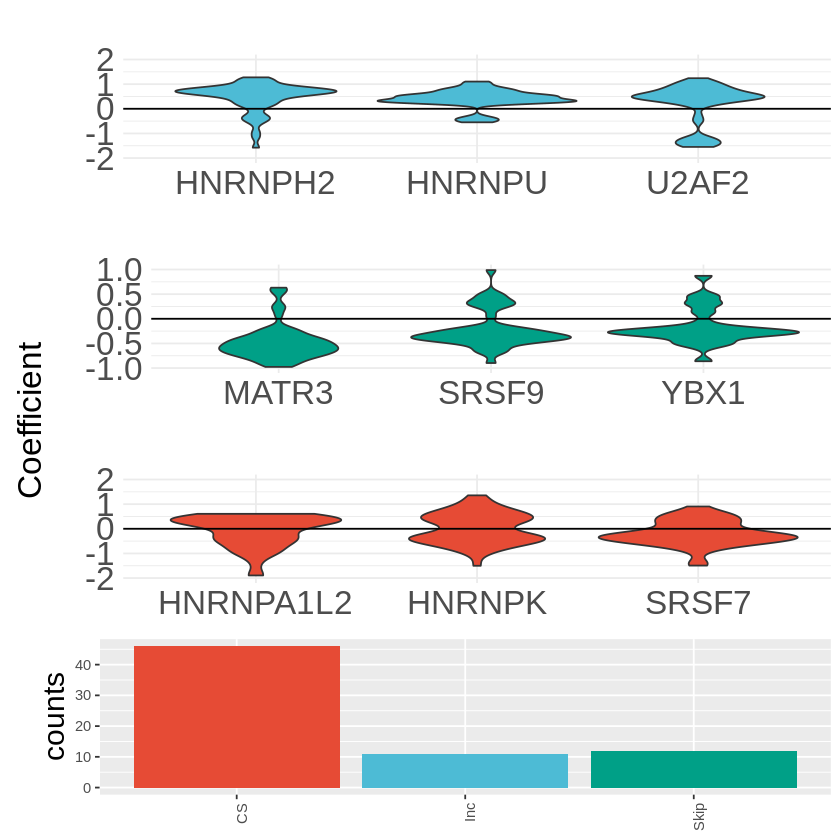

Warning message:
“Removed 4 rows containing non-finite values (stat_ydensity).”

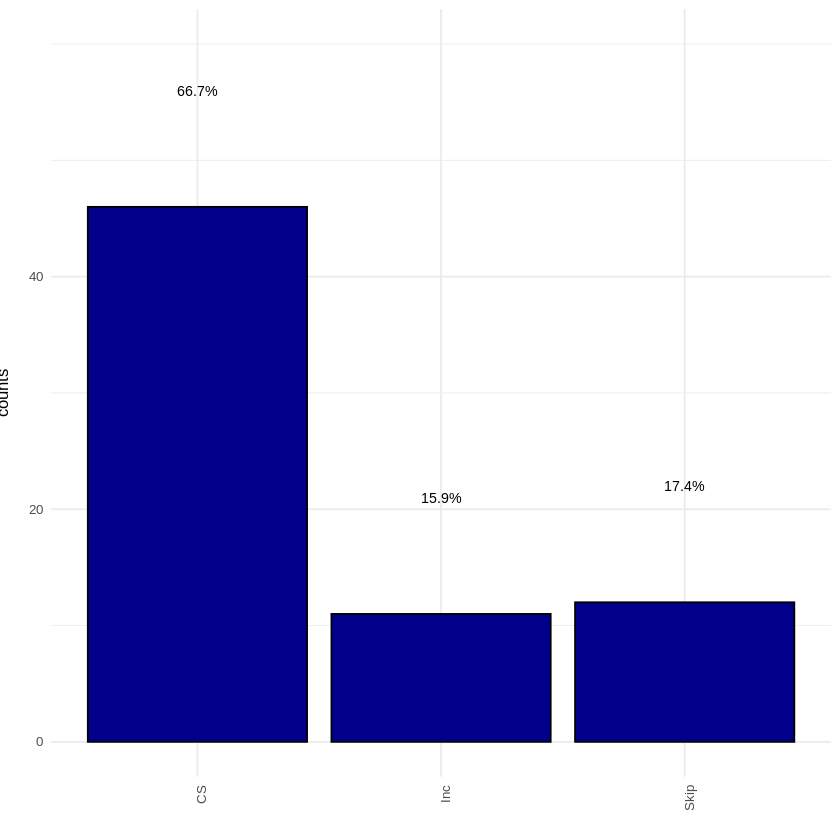

In [12]:
pn1<-ggplot(df1,aes(factor(RBP),Coef)) + geom_violin(aes(fill='red')) + scale_fill_manual(values = '#4DBBD5FF') 
pn1 <- pn1 + theme_minimal() +  theme(text = element_text(size=20),
                                      axis.text = element_text(size=20, hjust=0.5),
                                      axis.title.x=element_blank(),
                                      axis.title.y = element_text(size=24),
                                      plot.title = element_text(hjust = 0.5),
                                      legend.position = "none") + ylab("") + labs(title="")+ylim(-2,2)+ geom_hline(yintercept=0)
#pn <- pn +  geom_dotplot(binaxis='y', stackdir='center', dotsize=0.5)


sort(sum.neg,decreasing = T)

neg.rbps

sort(unlist(lapply(lapply(split(df$Coef,df$RBP),abs),sum)),decreasing = T)

df2<-df[df$RBP %in% c("YBX1", "SRSF9","MATR3"),]

pn2<-ggplot(df2,aes(factor(RBP),Coef)) +geom_violin(aes(fill='blue'))+ scale_fill_manual(values = '#00A087FF')
pn2 <- pn2 + theme_minimal() +  theme(text = element_text(size=20),
                                      axis.text = element_text(size=20, hjust=0.5),
                                      axis.title.x=element_blank(),
                                      axis.title.y = element_text(size=24),
                                      plot.title = element_text(hjust = 0.5),
                                      legend.position = "none") + ylab("") + labs(title="")+ylim(-1,1)+ geom_hline(yintercept=0)
#pn <- pn +  geom_dotplot(binaxis='y', stackdir='center', dotsize=0.5)


df3<-df[df$RBP %in% c("HNRNPK", "HNRNPA1L2","SRSF7"),]

pn3<-ggplot(df3,aes(factor(RBP),Coef)) +geom_violin(aes(fill='green')) + scale_fill_manual(values = '#E64B35FF') 
pn3 <- pn3 + theme_minimal() +  theme(text = element_text(size=20),
                                      axis.text = element_text(size=20, hjust=0.5),
                                      axis.title.x=element_blank(),
                                      axis.title.y = element_text(size=24),
                                      plot.title = element_text(hjust = 0.5),
                                      legend.position = "none") + ylab("") + labs(title="")+ylim(-2,2)+ geom_hline(yintercept=0)
#pn <- pn +  geom_dotplot(binaxis='y', stackdir='center', dotsize=0.5)


pn4<-ggplot(df.counts, aes(type, counts)) +  geom_bar(aes(fill = type), position = "dodge", stat="identity") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+ scale_fill_npg() + guides(fill=FALSE)+theme(axis.title.x=element_blank(),axis.title=element_text(size=18))



grid.arrange(pn1,pn2,pn3,pn4, nrow = 4,
             left = textGrob('Coefficient',gp = gpar(fontsize = 20), rot = 90,vjust=1))

df1$facet = 1
df2$facet = 2
df3$facet = 3
df_c <- rbind(df1, df2, df3)
p <- ggplot(df_c,aes(x = factor(RBP), y = Coef, fill = factor(RBP))) + 
  geom_violin() + facet_wrap(~facet, nrow = 3, scales = "free") + 
  xlab("") + ylab("") + ylim(-2,2)+ geom_hline(yintercept=0) + scale_fill_npg() +
  theme_minimal() +  theme(text = element_text(size=20),
                                      axis.text = element_text(size=8, hjust=0.5),
                                      axis.title.x=element_blank(),
                                      axis.title.y = element_text(size=8),
                                      plot.title = element_text(hjust = 0.5),
                                      legend.position = "none", 
                           strip.text = element_blank())
  
pn4_new <- ggplot(df.counts, aes(type, counts)) +  
  geom_bar(fill = "#00008B",color="black", position = "dodge", stat="identity") + 
  geom_text(aes(x = type, y = counts + 10, label = paste(100 * round(counts/sum(counts), 3), "%", sep = "")), size = 3) +
  guides(fill=FALSE) +
  xlab("") + scale_y_continuous(breaks = c(0, 20, 40), limits = c(0, 60))+
  theme_minimal() +
  theme(
        axis.text = element_text(size = 8), 
        axis.text.x = element_text(angle = 90, hjust = 1), 
        axis.title = element_text(size = 10),
        axis.title.y = element_text(vjust = 5)
        )
pn4_new  
p_grid <- arrangeGrob(p,pn4_new, nrow = 2, heights = c(3, 1), 
             left = textGrob('Coefficient',gp = gpar(fontsize = 10), rot = 90,vjust=1, hjust = -0.2))

## Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### 1. Checksums with the sha256 algorithm

In [ ]:
figure_id   = "Figure3"

message("Generating sha256 checksums of the artefacts in the `..data/` directory .. ")
system(paste0("cd ../data/ && sha256sum * > ../metadata/", figure_id, "_sha256sums.txt"), intern = TRUE)
message("Done!\n")

data.table::fread(paste0("../metadata/", figure_id, "_sha256sums.txt"), header = FALSE, col.names = c("sha256sum", "file"))

### 2. Libraries metadata

In [ ]:
figure_id   = "<the-figure-i-am-working-on>"

dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", figure_id, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", figure_id ,"_utils_info.rds"))
message("Done!\n")

session_info$platform
session_info$packages[session_info$packages$attached==TRUE, ]